In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
housing=pd.read_csv("/Users/mac/Desktop/DataScience/datsets/LondonHousingData.csv")
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [4]:
housing.isna().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

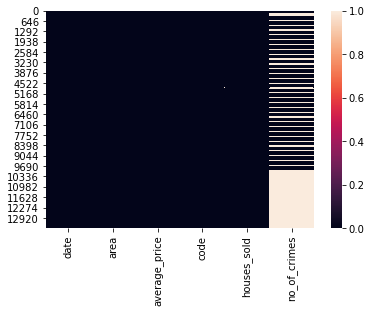

In [5]:
#To visualize the null values we will use heatmaps
sns.heatmap(housing.isnull())
plt.show()

Here black region means there is no null values and white region means null value is there 

# 1. Converting the date time to date time format

In [6]:
housing['date']=pd.to_datetime(housing['date'])

In [7]:
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [8]:
#Extracting year from the date and then adding new col called "year" to the housing data
housing['Year']=housing['date'].dt.year

In [9]:
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


In [10]:
housing['Month']=housing['date'].dt.month

In [11]:
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year,Month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995,5


# 2. The records where number of crimes=0 and their exact numbers

In [12]:
housing[housing['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes,Year,Month
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001,2
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001,3
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001,4
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001,5
...,...,...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0,2009,11
179,2009-12-01,city of london,411955,E09000001,16.0,0.0,2009,12
180,2010-01-01,city of london,464436,E09000001,20.0,0.0,2010,1
181,2010-02-01,city of london,490525,E09000001,9.0,0.0,2010,2


In [13]:
len(housing[housing['no_of_crimes']==0])

104

# 3. What is the max and min "avg price" per year ?

In [14]:
#For max
a=housing.groupby('Year').average_price.max()

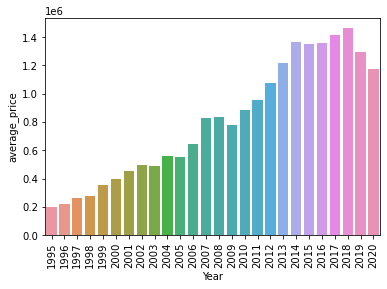

In [15]:
i=sns.barplot(a.index,a,data=housing)
i.set_xticklabels(rotation=90,labels=a.index);

In [30]:
#For min
j=housing.groupby('Year').average_price.min()

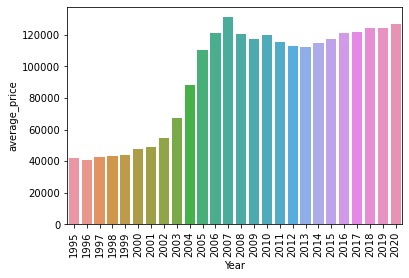

In [31]:
o=sns.barplot(j.index,j,data=housing)
o.set_xticklabels(rotation=90,labels=j.index);

# 4. What are the max and min No. of crimes reported per area?

In [19]:
area_max_crimes=housing.groupby('area').no_of_crimes.max().sort_values(ascending=True)

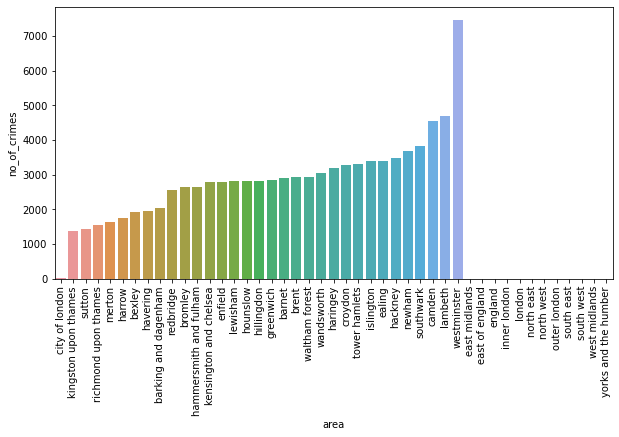

In [35]:
plt.figure(figsize=(10,5))
o1=sns.barplot(area_max_crimes.index,area_max_crimes,data=housing)
o1.set_xticklabels(rotation=90,labels=area_max_crimes.index);

In [21]:
area_min_crimes=housing.groupby('area').no_of_crimes.min().sort_values(ascending=True)

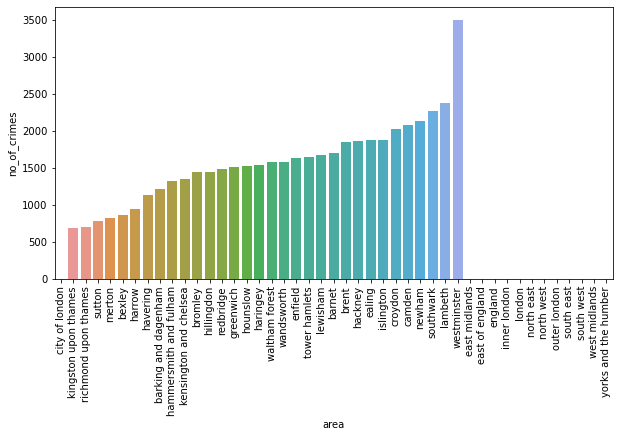

In [36]:
plt.figure(figsize=(10,5))
o2=sns.barplot(area_min_crimes.index,area_min_crimes,data=housing)
o2.set_xticklabels(rotation=90,labels=area_min_crimes.index);

In [23]:
housing.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,Year,Month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2


# 5. In which year max and houses were sold?

In [24]:
max_houses_sold=housing.groupby('Year').houses_sold.max().sort_values(ascending=True)

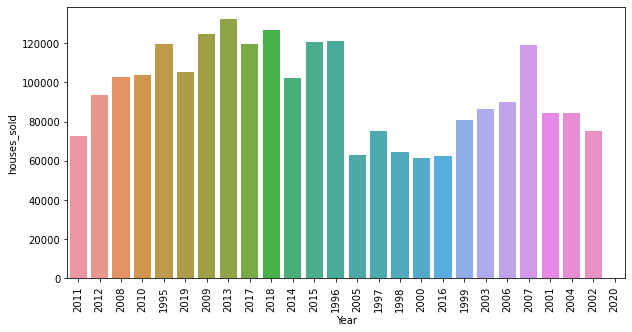

In [37]:
plt.figure(figsize=(10,5))
o3=sns.barplot(max_houses_sold.index,max_houses_sold,data=housing)
o3.set_xticklabels(rotation=90,labels=max_houses_sold.index);

In [26]:
min_houses_sold=housing.groupby('Year').houses_sold.min().sort_values(ascending=True)

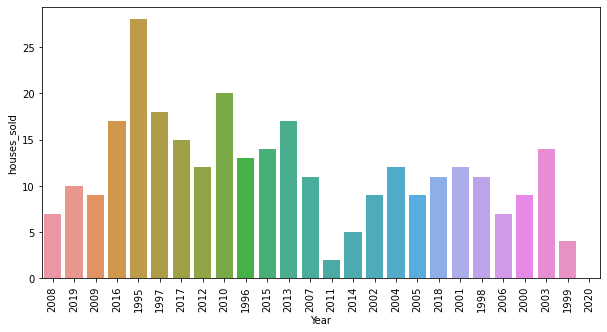

In [38]:
plt.figure(figsize=(10,5))
o4=sns.barplot(min_houses_sold.index,min_houses_sold,data=housing)
o4.set_xticklabels(rotation=90,labels=min_houses_sold.index);